# Food Desert And Health

Food Desert Theory: There is a direct relationship between a population’s access to fresh food and health. The purpose of this analysis explores whether the data supports the Food Desert Theory. 


### Questions

1. Does a change in access to grocery stores show correlation to change in health over time?
2. Are there outliers to this theory?
3. Are there other factors that impact health beyond access such as socio economics or region or culture?


In [84]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [85]:
#Import CSV File
desert = pd.read_csv("Food Desert_Data_jj.csv")
food_desert = desert.groupby('State').mean()

In [86]:
#DataFrame 
food_desert.head()

,Grocery 2009,Convenience 2009,Fast Food Restaurants 2009,Adult Diabetes % 2009,Adult Obsesity % 2009,Median Household Income 2009,Limited Access Population% 2009,Limited Access Population 2009,Population 2009,Grocery 2014,...,Population 2014,FF per capita 2009,FF per capita 2014,% change FF Per Capita,Grocery per capita 2009,Grocery per capita 2014,% change in grocery per capita,% change in Access,% Change in Obesity,% change in income
State,,,,,,,,,,,,,,,,,,,,,
AK,9.400000,6.000000,7.300000,7.880000,31.760000,50652.700000,36.800000,4066.000000,9371.700000,8.000000,...,9553.100000,0.001179,0.000469,-18.909000,0.001536,0.001250,-10.104000,13.310000,-3.868000,14.522000
AL,11.590909,46.954545,49.606061,13.906061,35.119697,36158.409091,16.909091,15479.530303,71153.681818,11.303030,...,72071.696970,0.000570,0.000584,1.949394,0.000209,0.000186,-6.459545,29.911364,3.277424,9.576970
AR,10.112676,32.042254,41.661972,12.401408,33.661972,35439.126761,19.056338,13986.169014,57926.732394,9.197183,...,58807.563380,0.000568,0.000562,2.233521,0.000221,0.000181,-12.675493,41.280000,7.626197,10.319155
AZ,64.692308,144.153846,309.615385,9.984615,28.069231,41814.615385,34.307692,92083.769231,486469.846154,62.307692,...,511791.769231,0.000517,0.000512,-1.579231,0.000141,0.000136,-1.438462,7.690769,3.651538,8.396154
CA,75.590909,90.750000,241.022727,8.279545,25.579545,48118.727273,21.340909,51613.681818,362603.431818,79.113636,...,376846.227273,0.000623,0.000629,1.688182,0.000278,0.000281,2.268864,-3.377500,-1.526136,9.622727


In [88]:
#Set Index
food_desert.reset_index(inplace=True)


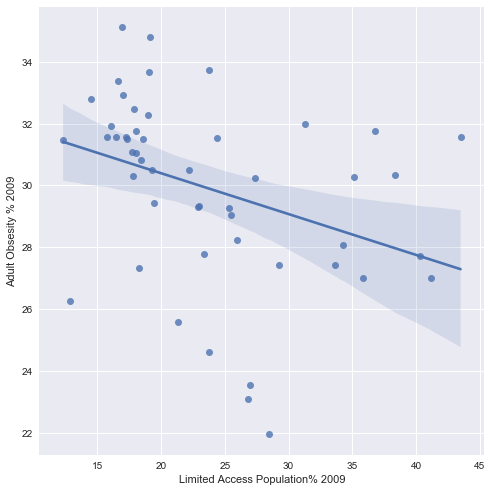

In [89]:
#Access Versus Health 2009- Correlation not found
sns.set()

# Household income against Limited Access
g = sns.lmplot(x="Limited Access Population% 2009", y="Adult Obsesity % 2009", truncate=True, size=7, data=food_desert)
plt.show()

plt.savefig("Access_v_Health_2009.png")

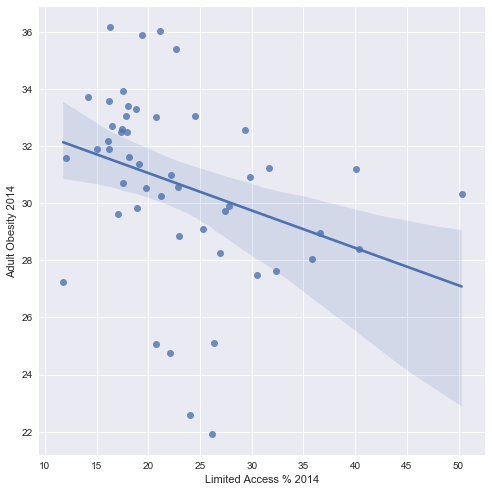

In [90]:
#Access Versus Health 2014- Correlation not found
sns.set()

# Household income against Limited Access
g = sns.lmplot(x="Limited Access % 2014", y="Adult Obesity 2014", truncate=True, size=7, data=food_desert)
plt.show()


plt.savefig("Access_v_Health_2014.png")

### 1. Does the data support the Food Desert Theory, where we expect to see a direct relationship between the percentage of population’s access to fresh food and their relative health?

We found that overtime we were able to find correlation between acces to adequate food and health. As limited access increased health became worse while inversley when limited access decreased health became better. 

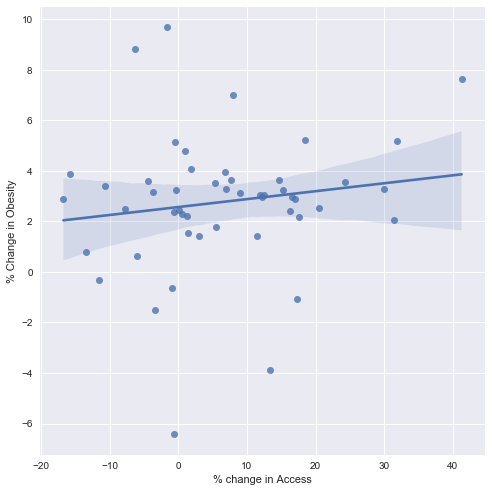

In [91]:
#Change Access Versus Change Obesity- Correlation Found
sns.set()

# Household income against Limited Access
w = sns.lmplot(x="% change in Access", y="% Change in Obesity", truncate=True, size=7, data=food_desert)
plt.show()


plt.savefig("Access_v_Obesity_chnge.png")

In [92]:
#Change in Obesity Versus Change in Access- Correlation Found
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Bar(
    x=food_desert['State'],
    y=food_desert['% change in Access'],
    name='Access'
)
trace2 = go.Bar(
    x=food_desert['State'],
    y=food_desert['% Change in Obesity'],
    name='Obesity'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
plt.savefig("accessvshealth.png")
py.iplot(fig, filename='grouped-bar')

In [93]:
#Change Fast Food and Change Grocery and Change Health
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Bar(
    x=food_desert['State'],
    y=food_desert['% change in grocery per capita'],
    name='Grocery'
)
trace2 = go.Bar(
    x=food_desert['State'],
    y=food_desert['% Change in Obesity'],
    name='Obesity'
)
trace3 = go.Bar(
    x=food_desert['State'],
    y=food_desert['% change FF Per Capita'],
    name='FF'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
plt.savefig("accessvshealth.png")
py.iplot(fig, filename='grouped-bar')

### 2. Are there outliers to this theory? 

We found that there were outliers that did not follow the the expected correlation. A majority of these outliers were where limited acces decreased but health became worse. 

In [103]:
#Identify Outliers
outlier_df = food_desert[['State', '% Change in Obesity', '% change in Access']]


In [104]:
#Sort through data that has opposite signs to find outliers and create new column
outlier_df['Outlier'] = outlier_df.apply((lambda x: (x[2]> 0 and x[1]>0) or (x[2]< 0 and x[1]<0)  ), axis = 1)
outlier_df.head()

#Export Outliers List
outlier_df.to_csv("Outliers.csv")

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [105]:
#Pull Outliers
outlier_list=outlier_df[outlier_df['Outlier'] == False]
outlier_list

,State,% Change in Obesity,% change in Access,Outlier
0,AK,-3.868000,13.310000,False
6,CT,9.686667,-1.623333,False
7,DE,2.875000,-16.720000,False
17,LA,5.148409,-0.480227,False
18,MA,0.770714,-13.382143,False
20,ME,0.627500,-5.960625,False
22,MN,3.579737,-4.340658,False
27,ND,3.401961,-10.590784,False
28,NE,2.488539,-7.723483,False
29,NH,8.821000,-6.348000,False


In [109]:
#Index Numbers
outlier_list.index
#Pull outliers data from original DataFrame
outlier_data = food_desert.iloc[[0, 6, 7, 17, 18, 20, 22, 27, 28, 29, 38, 41, 42, 45, 49],:]
outlier_data.head()

,index,State,Grocery 2009,Convenience 2009,Fast Food Restaurants 2009,Adult Diabetes % 2009,Adult Obsesity % 2009,Median Household Income 2009,Limited Access Population% 2009,Limited Access Population 2009,...,Population 2014,FF per capita 2009,FF per capita 2014,% change FF Per Capita,Grocery per capita 2009,Grocery per capita 2014,% change in grocery per capita,% change in Access,% Change in Obesity,% change in income
0,0,AK,9.400000,6.000000,7.300000,7.880000,31.760000,50652.700000,36.800000,4066.000000,...,9553.100000,0.001179,0.000469,-18.909000,0.001536,0.001250,-10.104000,13.310000,-3.868000,14.522000
6,6,CT,84.833333,125.666667,220.333333,7.483333,23.100000,67162.500000,26.833333,116899.833333,...,409714.333333,0.000491,0.000583,20.293333,0.000190,0.000201,4.110000,-1.623333,9.686667,12.111667
7,7,DE,32.500000,77.500000,112.000000,11.750000,31.050000,50036.000000,18.000000,32606.500000,...,191338.500000,0.000613,0.000590,-2.575000,0.000174,0.000188,15.355000,-16.720000,2.875000,9.960000
17,17,LA,16.477273,48.750000,58.022727,12.052273,33.740909,39219.681818,23.750000,23823.522727,...,87089.159091,0.000517,0.000544,5.187045,0.000225,0.000195,-10.515682,-0.480227,5.148409,9.418636
18,18,MA,61.571429,115.785714,203.714286,9.150000,24.621429,56539.428571,23.785714,74951.071429,...,290014.500000,0.000850,0.000895,5.889286,0.000273,0.000281,5.662143,-13.382143,0.770714,12.657143


In [110]:
# Create List Omitting Outliers
standard =food_desert.drop(food_desert.index[[0, 6, 7, 17, 18, 20, 22, 27, 28, 29, 38, 41, 42, 45, 49]])
standard.head()

,index,State,Grocery 2009,Convenience 2009,Fast Food Restaurants 2009,Adult Diabetes % 2009,Adult Obsesity % 2009,Median Household Income 2009,Limited Access Population% 2009,Limited Access Population 2009,...,Population 2014,FF per capita 2009,FF per capita 2014,% change FF Per Capita,Grocery per capita 2009,Grocery per capita 2014,% change in grocery per capita,% change in Access,% Change in Obesity,% change in income
1,1,AL,11.590909,46.954545,49.606061,13.906061,35.119697,36158.409091,16.909091,15479.530303,...,72071.696970,0.000570,0.000584,1.949394,0.000209,0.000186,-6.459545,29.911364,3.277424,9.576970
2,2,AR,10.112676,32.042254,41.661972,12.401408,33.661972,35439.126761,19.056338,13986.169014,...,58807.563380,0.000568,0.000562,2.233521,0.000221,0.000181,-12.675493,41.280000,7.626197,10.319155
3,3,AZ,64.692308,144.153846,309.615385,9.984615,28.069231,41814.615385,34.307692,92083.769231,...,511791.769231,0.000517,0.000512,-1.579231,0.000141,0.000136,-1.438462,7.690769,3.651538,8.396154
4,4,CA,75.590909,90.750000,241.022727,8.279545,25.579545,48118.727273,21.340909,51613.681818,...,376846.227273,0.000623,0.000629,1.688182,0.000278,0.000281,2.268864,-3.377500,-1.526136,9.622727
5,5,CO,13.857143,33.553571,63.928571,6.876786,21.951786,47755.446429,28.482143,18153.000000,...,92247.821429,0.000596,0.000587,1.272321,0.000334,0.000356,5.220357,0.107857,2.454821,10.479286


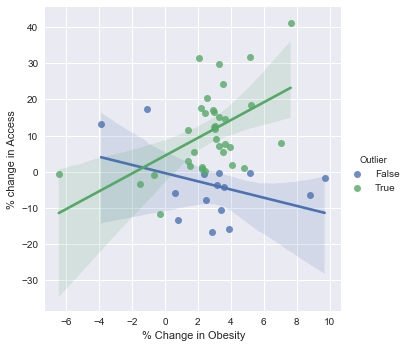

In [111]:
sns.set()


# Plot tip as a function of toal bill across days
g = sns.lmplot(x="% Change in Obesity", y="% change in Access", hue="Outlier",
               truncate=True, size=5, data=outlier_df)
plt.savefig("outvsstand2.png")
plt.show()

In [113]:
#Create Map for Outliers
import plotly.plotly as py
import pandas as pd

for col in outlier_list.columns:
    outlier_list[col] = outlier_list[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = outlier_list['State'],
        z = outlier_list["% Change in Obesity"].astype(float),
        locationmode = 'USA-states',
       # text = texas_desert['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Obesity Percent Change")
        ) ]

layout = dict(
        title = 'Outliers Obesity Percent Change',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plt.savefig("outliersmap.png")
py.iplot( fig, filename='d3-cloropleth-map' )

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### 3. Are there other factors that impact health beyond access such as socio economics or region or culture?

The theory argues that low income populations are more impacted by change in grocery accessibility and since the outlier states had higher median income they were less impacted by the change in grocery.

In [117]:
#Full data obesity vs income comparrison
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Bar(
    x=['Outlier'],
    y=outlier_data['% change in income'].mean(),
    name='Outlier'
)
trace2 = go.Bar(
    x=['Standard'],
    y=standard['% change in income'].mean(),
    name='Standard'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
plt.savefig("MedianIncome.png")
py.iplot(fig, filename='grouped-bar')

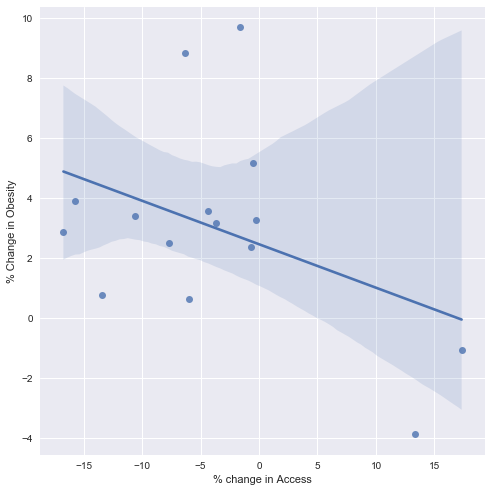

In [118]:
#Outlier Change Acces Versus Change Health 
sns.set()

# Household income against Limited Access
w = sns.lmplot(x="% change in Access", y="% Change in Obesity", truncate=True, size=7, data=outlier_data)
plt.show()

plt.savefig("Access_v_Obesity_chnge.png")

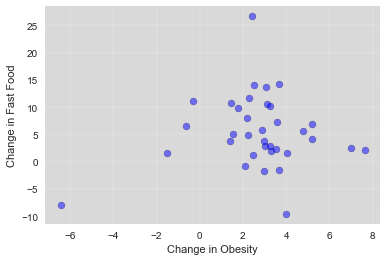

In [119]:
#States Change in Obesity Versus Change in Fast Food
x7_axis = standard['% Change in Obesity']

y7_axis = standard['% change FF Per Capita']

#low access vs. diabetes

plt.scatter(x7_axis, y7_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
#plt.title("")
plt.xlabel("Change in Obesity")
plt.ylabel("Change in Fast Food")

#plot grid
plt.grid(True, color='w', linestyle='-', linewidth=.2)
plt.gca().patch.set_facecolor('0.85')

plt.savefig("standard_obesity_v_ff.png")
plt.show()

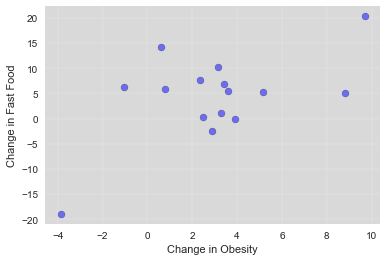

In [120]:
#Outlier States Change in Obesity Versus Change in Fast Food
x7_axis = outlier_data['% Change in Obesity']

y7_axis = outlier_data['% change FF Per Capita']

#low access vs. diabetes

plt.scatter(x7_axis, y7_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
#plt.title("Diabetes vs Limited Access")
plt.xlabel("Change in Obesity")
plt.ylabel("Change in Fast Food")

#plot grid
plt.grid(True, color='w', linestyle='-', linewidth=.2)
plt.gca().patch.set_facecolor('0.85')

plt.savefig("outlier_obesity_v_ff.png")
plt.show()

In [121]:
#An exploration into outlier versus standard states differences
full_desert = pd.read_csv("Food Desert_Data_jj.csv")
GA_data = full_desert[full_desert['State']=='GA']
MA_data = full_desert[full_desert['State']=='MA']
MT_data = full_desert[full_desert['State']=='MT']

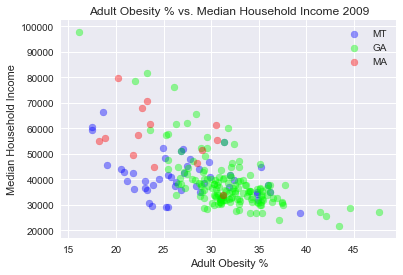

In [122]:
#Select States Obesity vs Income 2009
fig, ax1 = plt.subplots()
x1 = MT_data['Adult Obsesity % 2009']
y1 = MT_data['Median Household Income 2009']
x2 = GA_data['Adult Obsesity % 2009']
y2 = GA_data['Median Household Income 2009']
x3 = MA_data['Adult Obsesity % 2009']
y3 = MA_data['Median Household Income 2009']

ax1.scatter(x1,y1, c= "blue", alpha=0.4, label = "MT")
ax1.scatter(x2,y2, c= "lime", alpha=0.4, label = "GA")
ax1.scatter(x3,y3, c= "red", alpha=0.4, label = "MA")
ax1.grid(True)

plt.title("Adult Obesity % vs. Median Household Income 2009")
plt.xlabel("Adult Obesity %")
plt.ylabel("Median Household Income")
plt.legend()
plt.savefig("select_state_health_versus_income_09.png")
plt.show()

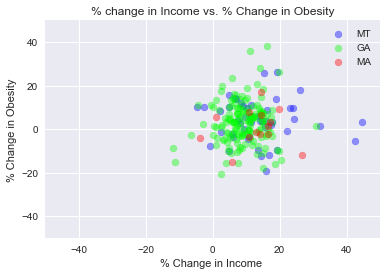

In [123]:
#% change in Obesity vs % change in Income
fig, ax1 = plt.subplots()
x1 = MT_data['% change in income']
y1 = MT_data['% Change in Obesity']
x2 = GA_data['% change in income']
y2 = GA_data['% Change in Obesity']
x3 = MA_data['% change in income']
y3 = MA_data['% Change in Obesity']

ax1.scatter(x1,y1, c= "blue", alpha=0.4, label = "MT")
ax1.scatter(x2,y2, c= "lime", alpha=0.4, label = "GA")
ax1.scatter(x3,y3, c= "red", alpha=0.4, label = "MA")
ax1.grid(True)

plt.title("% change in Income vs. % Change in Obesity")
plt.xlabel("% Change in Income ")
plt.ylabel("% Change in Obesity")
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.legend()
plt.savefig("select_state_health_versus_income.png")
plt.show()